In [1]:
import numpy as np 
from sklearn_som.som import SOM 
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Loading a numpy array from a file
clean_feature_array = np.load('cuttedImages.npy')
# Transpose the array
clean_feature_array = clean_feature_array.T
print(clean_feature_array.shape)

# Size of pixels 
sizPix = clean_feature_array.shape[1]

print(sizPix)

(189498, 927)
927


In [4]:
clean_feature_array.shape

(189498, 927)

In [5]:
# Calculate min and max values of clean_feature_array
print(np.amin(clean_feature_array))
print(np.amax(clean_feature_array))
valMax = np.amax(clean_feature_array)
valMin = np.amin(clean_feature_array)

clean_feature_array_norm = np.zeros(clean_feature_array.shape)
# Normalization by the minimum of each row 
#for i in range(clean_feature_array.shape[0]):
  #  clean_feature_array_norm[i] = (clean_feature_array[i] - np.amin(clean_feature_array[i])) / (np.amax(clean_feature_array[i]) - np.amin(clean_feature_array[i]))
# Normalization by the maximum of each row 
for i in range(clean_feature_array.shape[0]):
    clean_feature_array_norm[i] = (clean_feature_array[i]) / (np.amax(clean_feature_array[i]))
# Normalization by its minimum or maximum value 
#clean_feature_array_norm = (clean_feature_array / valMax )
#clean_feature_array_norm = (clean_feature_array - valMin) /(valMax - valMin)
#print(np.amin(clean_feature_array_norm))
#print(np.amax(clean_feature_array_norm))

-8.265599429607391
6005.01025390625


In [6]:
clean_feature_array_norm.shape

(189498, 927)

In [8]:
clean_feature_array_norm[0,:]

array([0.33690262, 0.2611223 , 0.36353541, 0.28062293, 0.39920902,
       0.33472632, 0.20599234, 0.14910977, 0.24927894, 0.18915106,
       0.39907562, 0.27757304, 0.35663163, 0.21304441, 0.18874381,
       0.16531158, 0.22243198, 0.18582843, 0.29712998, 0.29518458,
       0.31138669, 0.21303777, 0.28467064, 0.13540338, 0.20314862,
       0.2131892 , 0.29547025, 0.209222  , 0.17808435, 0.28346094,
       0.28850313, 0.15930287, 0.27159256, 0.27799071, 0.3169717 ,
       0.16720277, 0.23333752, 0.2905122 , 0.19075075, 0.24058387,
       0.24190059, 0.2469779 , 0.21151959, 0.27353723, 0.30522063,
       0.26745435, 0.15808137, 0.2910749 , 0.23301272, 0.25766468,
       0.25610046, 0.32304985, 0.33546184, 0.30522343, 0.29332276,
       0.18816443, 0.08594216, 0.36762414, 0.14296616, 0.24514427,
       0.30276122, 0.36636954, 0.16160974, 0.31871295, 0.24036009,
       0.24439443, 0.33571251, 0.24789191, 0.30850988, 0.25384038,
       0.24043681, 0.27449333, 0.21352426, 0.3252168 , 0.23883

In [15]:
# Threshold  clean_feature_array_norm (you can do it with the not normalized array too)
clean_feature_array_norm_th = clean_feature_array_norm.copy()
rows_to_delete = []  # Keep track of rows to delete
rows_to_maintain = []

# sum all the intensities of each event
for i in range(len(clean_feature_array_norm_th[:,0])):
    if np.sum(clean_feature_array_norm_th[i,:]) > 600:
        rows_to_delete.append(i)
        print("Event to delete: ", i)
    else:
        rows_to_maintain.append(i)
print("Number of events to delete: ", len(rows_to_delete))

#new array with the rows to maintain
clean_feature_array_norm_th = np.zeros((len(rows_to_maintain), len(clean_feature_array_norm[0,:])))
#move all columns to be maintained using the list columns_to_maintain
clean_feature_array_norm_th = clean_feature_array_norm[rows_to_maintain, :]
print("Number of events:", len(clean_feature_array_norm_th[:,0]))

Event to delete:  44
Event to delete:  100
Event to delete:  162
Event to delete:  288
Event to delete:  359
Event to delete:  429
Event to delete:  489
Event to delete:  545
Event to delete:  609
Event to delete:  667
Event to delete:  722
Event to delete:  783
Event to delete:  900
Event to delete:  956
Event to delete:  1016
Event to delete:  1078
Event to delete:  1153
Event to delete:  1205
Event to delete:  1275
Event to delete:  1325
Event to delete:  1381
Event to delete:  1439
Event to delete:  1573
Event to delete:  1630
Event to delete:  1684
Event to delete:  1746
Event to delete:  1814
Event to delete:  1880
Event to delete:  1944
Event to delete:  2003
Event to delete:  2058
Event to delete:  2133
Event to delete:  2191
Event to delete:  2259
Event to delete:  2319
Event to delete:  2421
Event to delete:  2481
Event to delete:  2622
Event to delete:  2688
Event to delete:  2766
Event to delete:  2836
Event to delete:  2899
Event to delete:  2967
Event to delete:  3026
Eve

In [5]:
# Threshold  clean_feature_array (you can do it with the normalized array too)
clean_feature_array_th = clean_feature_array.copy()
rows_to_delete = []  # Keep track of rows to delete
rows_to_maintain = []

# sum all the intensities of each event
for i in range(len(clean_feature_array_th[:,0])):
    if np.sum(clean_feature_array_th[i,:]) > 60000:
        rows_to_delete.append(i)
        print("Event to delete: ", i)
    else:
        rows_to_maintain.append(i)
print("Number of events to delete: ", len(rows_to_delete))

#new array with the rows to maintain
clean_feature_array_th = np.zeros((len(rows_to_maintain), len(clean_feature_array[0,:])))
#move all columns to be maintained using the list columns_to_maintain
clean_feature_array_th = clean_feature_array[rows_to_maintain, :]
print("Number of events:", len(clean_feature_array_th[:,0]))

Event to delete:  44
Event to delete:  100
Event to delete:  162
Event to delete:  288
Event to delete:  359
Event to delete:  429
Event to delete:  489
Event to delete:  545
Event to delete:  609
Event to delete:  667
Event to delete:  722
Event to delete:  783
Event to delete:  900
Event to delete:  956
Event to delete:  1016
Event to delete:  1078
Event to delete:  1153
Event to delete:  1205
Event to delete:  1275
Event to delete:  1325
Event to delete:  1381
Event to delete:  1439
Event to delete:  1573
Event to delete:  1630
Event to delete:  1684
Event to delete:  1746
Event to delete:  1814
Event to delete:  1880
Event to delete:  1944
Event to delete:  2003
Event to delete:  2058
Event to delete:  2133
Event to delete:  2191
Event to delete:  2259
Event to delete:  2319
Event to delete:  2373
Event to delete:  2421
Event to delete:  2481
Event to delete:  2550
Event to delete:  2622
Event to delete:  2688
Event to delete:  2766
Event to delete:  2836
Event to delete:  2899
Eve

In [18]:
# The som has NxN neurons 
# sizPix represents the number of features
N=40
som25 = SOM(m = N, n = N, dim = sizPix, max_iter=19000)


In [19]:
# epochs is the number of iterations for the training
#som25.fit(clean_feature_array_norm, epochs=200)
#som25.fit(clean_feature_array_norm, epochs=10)
som25.fit(clean_feature_array_norm_th, epochs=300)
#som25.fit(clean_feature_array, epochs=200)


KeyboardInterrupt: 

In [150]:
# Weights represent the position of the neurons in 
# the feature space
weights_ini = som25.weights
print(weights_ini.shape)
# reshape first index from 400 to 20x20 two indices
# From 1D array to 3D array
weights = weights_ini.reshape(N,N,sizPix)
print(weights.shape)

(100, 927)
(10, 10, 927)


In [151]:
# Check that weigths_ini and weights are the same
print(weights_ini[N+N+2, 0])
print(weights[2, 2, 0])

2.612500317831328
2.612500317831328


In [152]:
# Load pix_x.npy and pix_y.npy
pix_x = np.load('pix_x.npy')
pix_y = np.load('pix_y.npy')
print(pix_x.shape)
print(pix_y.shape)

(1855,)
(1855,)


In [153]:
# Reduce the lenght of the pixels by a factor of 2 by making the mean of every 2 pixels
reduction_factor = 2
counter = 0
new_pix_x = np.zeros(len(pix_x) // reduction_factor)
new_pix_y = np.zeros(len(pix_y) // reduction_factor)    
print(new_pix_x.shape, new_pix_y.shape)

# Loop over the pixel's positions and make the mean of every reduction_factor pixels
for i in range(len(new_pix_x)):
    if i <= (len(pix_x) // reduction_factor) - 1:
        new_pix_x[i] = np.mean((pix_x[i * reduction_factor], pix_x[(i * reduction_factor) + 1]))
        new_pix_y[i] = np.mean((pix_y[i * reduction_factor], pix_y[(i * reduction_factor) + 1]))
    else:
        new_pix_x[i] = pix_x[i]
        new_pix_y[i] = pix_y[i]

print(new_pix_x.shape, new_pix_y.shape)

(927,) (927,)
(927,) (927,)


In [154]:
# 2D list of tuples
vecs = [(new_pix_x[i], new_pix_y[i]) for i in range(len(new_pix_x))]
#print(len(vecs))

In [155]:
# Calculate max_x and min_x, print
max_x = max(new_pix_x)
min_x = min(new_pix_x)
print(f"max_x: {max_x}, min_x: {min_x}")
# Calculate max_y and min_y, print
max_y = max(new_pix_y)
min_y = min(new_pix_y)
print(f"max_y: {max_y}, min_y: {min_y}")

max_x: 1.1480670414834298, min_x: -1.1669645876012698
max_y: 1.080179507909651, min_y: -1.080179507909651


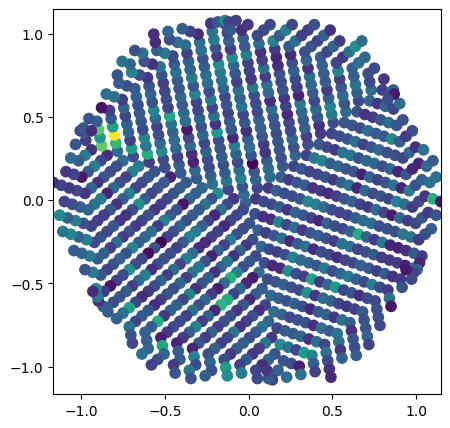

In [156]:
# Plot the weights of a node
firstNodeData = clean_feature_array_th[900] # weights[1,1,:]
# scatter plot, pix_x, pix_y, s = 1, c = firstNodeData. big circles
plt.scatter(new_pix_x, new_pix_y, s = 55, c = firstNodeData)

# x and y limits for the plot
plt.xlim(min_x, max_x)
plt.ylim(min_x, max_x)
# square size
plt.gcf().set_size_inches(5,5)
plt.show()


In [157]:
# now do a different plot. go through a MxM matrix, select the color of the nearest node
# separate the storage of nearest node index and then color assignment
M = 50
matrixI = np.zeros((M,M), dtype = int)
for i in range(M):
    for j in range(M):
        x = min_x + (max_x - min_x)*i/M
        y = min_y + (max_y - min_y)*j/M
        # find the nearest node from vecs
        # vecs is a list of tuples
        minDist = 1000000
        for k in range(len(vecs)):
            # Euclidean distance between position (x,y) and vecs[k]
            dist = (vecs[k][0]-x)**2 + (vecs[k][1]-y)**2
            if dist < minDist:
                minDist = dist
                matrixI[i,j] = k


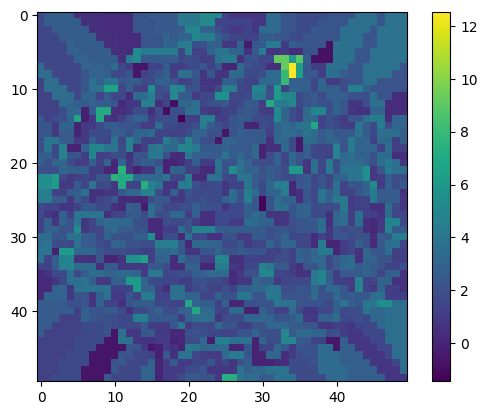

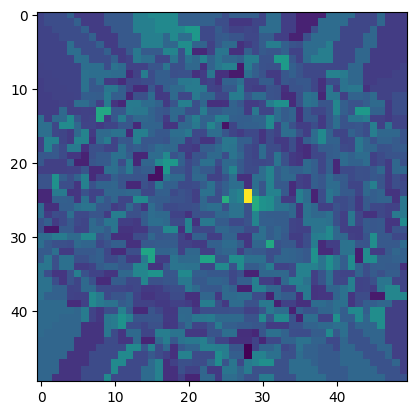

In [158]:
# calculate matrixC
matrixC = np.zeros((M,M))
for i in range(M):
    for j in range(M):
        matrixC[i,j] = firstNodeData[matrixI[i,j]]
plt.imshow(matrixC)
# colorbar
plt.colorbar()
plt.show()
# now matrixC with a different node
secondNodeData = clean_feature_array_th[1329]# weights[2,2,:]
matrixC = np.zeros((M,M))
for i in range(M):
    for j in range(M):
        matrixC[i,j] = secondNodeData[matrixI[i,j]]
plt.imshow(matrixC)
plt.show()


0.0


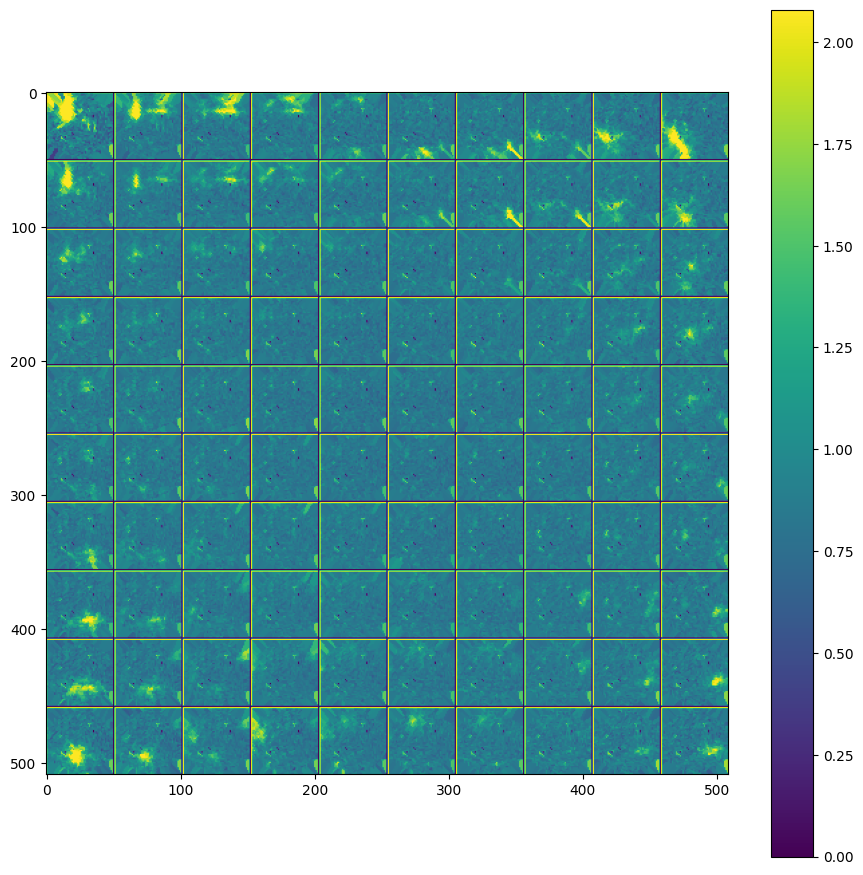

In [164]:
# Create a super matrix for all the nodes to store in a single 2D image
# N is the number of nodes in the SOM
# M is the size of the matrix for each node
# Dimensions of the super matrix
widthPixels = M*N+(N-1) # Separation of 1 pix between each node
heightPixels = M*N+(N-1) # same
superMatrix = np.zeros((widthPixels, heightPixels))
# Iterate over the nodes
for i in range(N):
    for j in range(N):
        # Fill with the data from the node
        nodeData = weights[i,j,:]
        for k in range(M):
            for l in range(M):
                # Fill with data of the nearest node
                superMatrix[i*M+i+k,j*M+j+l] = nodeData[matrixI[k,l]]
borderValue = np.max(superMatrix)
for i in range(N):
    for j in range(N):
        # Set the borders
        superMatrix[i*M+i:i*M+i+M,j*M+j] = borderValue
        superMatrix[i*M+i,j*M+j:j*M+j+M] = borderValue
print(np.min(superMatrix))

superMatrix2=np.clip(superMatrix, 1,8)
# Linear case 
#plt.imshow(superMatrix2)
# Logarithmic scale
plt.imshow(np.log(superMatrix2))
# Make it bigger
plt.gcf().set_size_inches(11,11)
# Add colorbar
plt.colorbar()
plt.show()

0.0


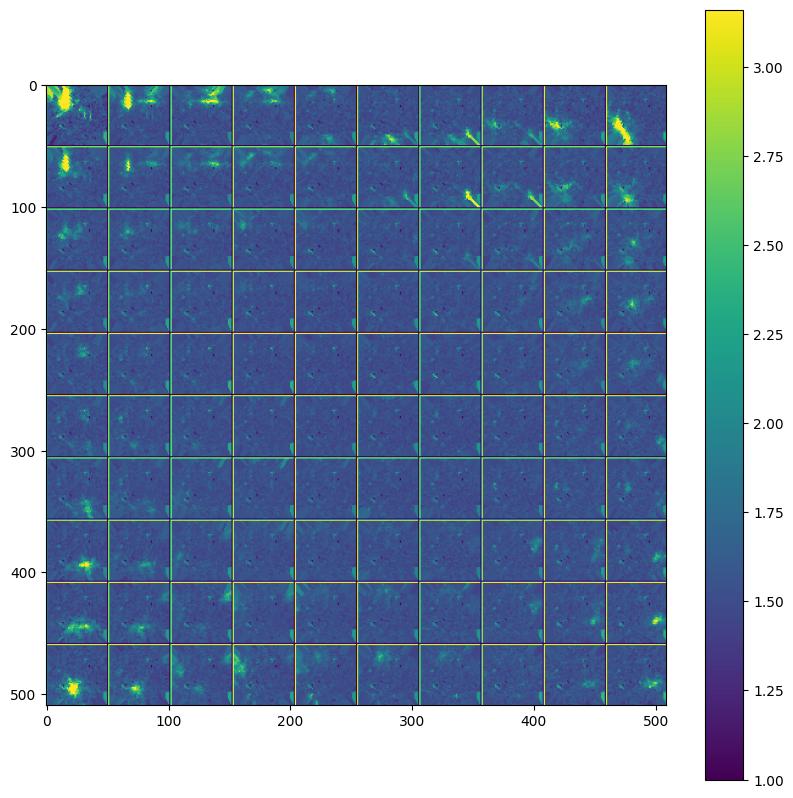

In [165]:
# Create a super matrix for all the nodes to store in a single 2D image
# N is the number of nodes in the SOM
# M is the size of the matrix for each node
# Dimensions of the super matrix
widthPixels = M*N+(N-1) # Separation of 1 pix between each node
heightPixels = M*N+(N-1) # same
superMatrix = np.zeros((widthPixels, heightPixels))
# Iterate over the nodes
for i in range(N):
    for j in range(N):
        # Fill with the data from the node
        nodeData = weights[i,j,:]
        for k in range(M):
            for l in range(M):
                # Fill with data of the nearest node
                superMatrix[i*M+i+k,j*M+j+l] = nodeData[matrixI[k,l]]
borderValue = np.max(superMatrix)
for i in range(N):
    for j in range(N):
        # Set the borders
        superMatrix[i*M+i:i*M+i+M,j*M+j] = borderValue
        superMatrix[i*M+i,j*M+j:j*M+j+M] = borderValue
print(np.min(superMatrix))

superMatrix2=np.clip(superMatrix, 1,10)
# Logarithmic scale
plt.imshow(np.sqrt(superMatrix2))
# Make it bigger
plt.gcf().set_size_inches(10,10)
# Add colorbar
plt.colorbar()
plt.show()